# CURSO PANDAS: SELECIONANDO E AGRUPANDO DADOS
## Análise exploratória dos dados de emissões de gases de efeito estufa no Brasil entre os anos de 1970 e 2021, conforme dados extraídos do SEEG (Sistema de Estimativas de Emissões e Remoções de Gases de Efeito Estufa).

In [1]:
import pandas as pd

### Obtendo os dados

In [2]:
dados_gases_por_estado = pd.read_excel('dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')

/Users/prvrc/anaconda3/envs/untitled/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:332: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
dados_gases_por_estado.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [4]:
dados_gases_por_estado.info() # Retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e o tipo de dado de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a base de dados
##### Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto, vamos identificar os tipos de dados únicos da coluna Emissão / Remoção / Bunker
###### Remoções são dados referentes à retirada dos gases da atmosfera. Bunker é o nome dado aos gases emitidos por embarcações e aviões. NCI refere-se a dados não contemplados no inventário nacional.

In [5]:
dados_gases_por_estado['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [6]:
(dados_gases_por_estado['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (dados_gases_por_estado['Emissão / Remoção / Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [7]:
remocoes_por_estado = dados_gases_por_estado[dados_gases_por_estado['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])] # Retorna somente os dados que possuem os valores 'Remoção NCI' e 'Remoção' na coluna 'Emissão / Remoção / Bunker'
remocoes_por_estado

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [8]:
# dados_gases_por_estado.loc[dados_gases_por_estado['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021] # A função loc retorna os dados conforme o índice da linha e o nome da coluna
dados_remocoes_por_estado_por_ano = remocoes_por_estado.loc[:, 1970:2021] # Retorna somente as colunas que possuem os anos de 1970 a 2021
dados_remocoes_por_estado_por_ano

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [9]:
dados_remocoes_por_estado_por_ano.max() # Retorna o valor máximo de cada coluna. O valor máximo de cada coluna é o valor máximo de emissão de gases de efeito estufa de cada estado. Logo, se o valor máximo da coluna é zero, significa que o estado não emitiu gases de efeito estufa naquele ano. Do mesmo modo, admitem-se valores negativos nesta coluna, indicando que o estado retirou gases da atmosfera. 

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [10]:
dados_gases_por_estado.loc[dados_gases_por_estado['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique() # Retorna os estados que possuem dados de emissão de gases por embarcações e aviões

array([nan], dtype=object)

In [11]:
dados_gases_por_estado = dados_gases_por_estado[dados_gases_por_estado['Emissão / Remoção / Bunker'] == 'Emissão']
dados_gases_por_estado

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [12]:
dados_gases_por_estado = dados_gases_por_estado.drop(columns=['Emissão / Remoção / Bunker']) # Remove a coluna 'Emissão / Remoção / Bunker', porque todos os dados desta coluna são iguais a 'Emissão'
dados_gases_por_estado

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### Modificando o formato do dataframe

In [13]:
dados_gases_por_estado.loc[:, 'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [14]:
colunas_info = list(dados_gases_por_estado.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [15]:
dados_gases_por_estado.loc[:, 1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [16]:
colunas_emissao = list(dados_gases_por_estado.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [17]:
emissoes_por_ano = dados_gases_por_estado.melt(id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão')
emissoes_por_ano

# A função melt transforma as colunas de um dataframe em linhas. A função recebe como parâmetro as colunas que serão mantidas como índice e as colunas que serão transformadas em linhas. O parâmetro var_name recebe o nome da coluna que será criada para armazenar os nomes das colunas que foram transformadas em linhas. O parâmetro value_name recebe o nome da coluna que será criada para armazenar os valores das colunas que foram transformadas em linhas.

# O objetivo é transformar o dataframe de um formato amplo (wide) para um formato longo (long).

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


### Agrupamento de dados com o método groupby

In [18]:
emissoes_por_ano.groupby('Gás') # Retorna um objeto do tipo DataFrameGroupBy

In [19]:
emissoes_por_ano.groupby('Gás').groups # Retorna um dicionário com os grupos criados. Cada chave é um tipo de gás e o valor são os índices referentes à posição em que se encontra aquele dado.

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [20]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)') # Retorna um dataframe com os dados do gás CO2

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


In [21]:
emissoes_por_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [22]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values(by='Emissão', ascending=False) # Retorna um dataframe com a soma das emissões de cada gás, ordenado do maior para o menor
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


<Axes: title={'center': 'Emissão de gases de efeito estufa no Brasil entre 1970 e 2021 | Acumulado por gás'}, xlabel='Emissão (t)', ylabel='Gás'>

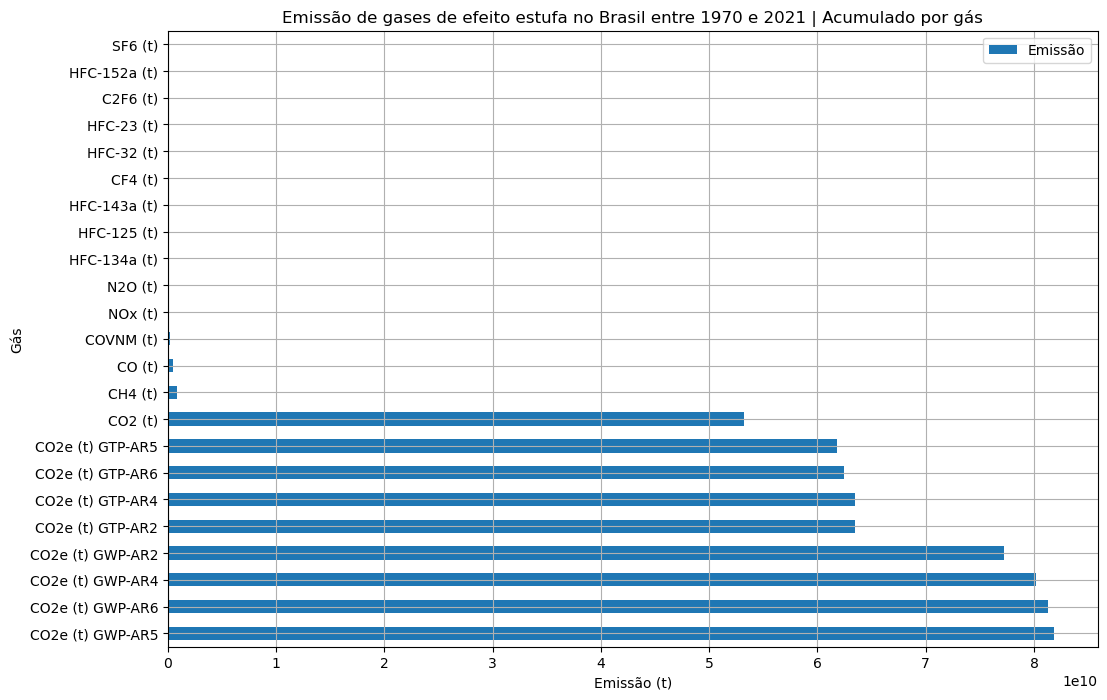

In [23]:
emissao_por_gas.plot(kind = 'barh', figsize=(12, 8), title='Emissão de gases de efeito estufa no Brasil entre 1970 e 2021 | Acumulado por gás', xlabel='Emissão (t)', ylabel='Gás', grid=True)

In [24]:
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [25]:
emissao_total_co2 = emissao_por_gas.iloc[0:9].sum()
emissao_total = emissao_por_gas.sum()
print(f'A emissão de CO2 corresponde a {float((emissao_total_co2/emissao_total).iloc[0])*100:.2f} % de emissão total de gases de efeito estufa no Brasil entre 1970 e 2021.')

A emissão de CO2 corresponde a 99.74 % de emissão total de gases de efeito estufa no Brasil entre 1970 e 2021.


###### Anotações sobre o método GROUPBY
O agrupamento de dados é uma aplicação muito utilizada para encontrar medidas resumidas e ter um entendimento maior dos dados. Com a biblioteca pandas, é possível utilizar o método groupby, que é um processo que ocorre através de diferentes etapas conhecidas como split-apply-combine ou dividir, aplicar e combinar, em português.

A etapa "dividir" consiste basicamente em separar o conjunto de dados em diferentes tabelas, uma para cada grupo. Os grupos são gerados a partir das categorias de uma ou mais colunas da tabela com base na informação que desejamos agrupar. Nesta etapa, podemos visualizar os grupos formados com o atributo groups e visualizar os dados de um grupo específico a partir do método get_group().

Já a etapa "aplicar" se refere ao momento de utilizar uma função matemática nos dados de cada grupo separadamente. Se o desejo for encontrar o valor total de cada grupo, então a soma será aplicada a cada grupo; se quisermos o valor médio, a função média será aplicada a cada grupo, e assim por diante. Existem diversas funções que podem ser aplicadas e cada uma dependerá do objetivo de análise dos dados:

>mean() : calcula a média dos grupos
sum() : calcula a soma dos valores do grupo
size() : calcula tamanhos de grupo
count() : calcula a contagem do grupo
std() : desvio padrão de grupos
var() : calcula a variação de grupos
sem() : erro padrão da média dos grupos
describe() : gera estatísticas descritivas
first() : calcula o primeiro dos valores do grupo
last() : calcula o último dos valores do grupo
nth() : pega o n-ésimo valor do grupo
min() : calcula o mínimo de valores do grupo
max() : calcula o máximo de valores do grupo

Por fim, a etapa "combinar" consiste em juntar todas as informações de agregação de cada grupo em uma única tabela, contendo o resumo das informações. A partir dela e com o resultado final, é possível extrair insights a partir dos dados e fazer comparações dos resultados entre cada grupo.

### Setores mais poluentes para cada tipo de gás

#### Agrupar dados por duas colunas (gás e setor)
### DataFrame multi-index

In [26]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum().sort_values(by='Emissão', ascending=False)
gas_por_setor

,,Emissão
Gás,Nível 1 - Setor,
CO2e (t) GWP-AR5,Mudança de Uso da Terra e Floresta,4.051523e+10
CO2e (t) GWP-AR6,Mudança de Uso da Terra e Floresta,4.049216e+10
CO2e (t) GWP-AR4,Mudança de Uso da Terra e Floresta,4.030837e+10
CO2e (t) GWP-AR2,Mudança de Uso da Terra e Floresta,3.999424e+10
CO2e (t) GTP-AR2,Mudança de Uso da Terra e Floresta,3.850044e+10
...,...,...
HFC-32 (t),Processos Industriais,2.367750e+03
HFC-23 (t),Processos Industriais,1.197840e+03
C2F6 (t),Processos Industriais,5.765018e+02


In [27]:
gas_por_setor.xs('CO2 (t)', level='Gás') # Retorna os dados do gás CO2
# O método xs() retorna os dados de um grupo específico.

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.733930e+10
Energia,1.261352e+10
Processos Industriais,2.729603e+09
Agropecuária,5.411750e+08
Resíduos,2.276264e+07


In [28]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level=('Gás', 'Nível 1 - Setor')) # Retorna os dados do gás CO2 e do setor Mudança de Uso da Terra e Floresta

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [29]:
gas_por_setor.xs('CO2 (t)', level='Gás').max()

Emissão    3.733930e+10
dtype: float64

In [30]:
gas_por_setor.xs('CO2 (t)', level='Gás').idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

In [31]:
gas_por_setor.groupby(level='Gás').idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [32]:
gas_por_setor.groupby(level='Gás').max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [33]:
valores_max = gas_por_setor.groupby(level='Gás').max().values

#### Criação da tabela sumarizada

In [34]:
tabela_sumarizada = gas_por_setor.groupby(level='Gás').idxmax()
tabela_sumarizada.insert(1, 'Quantidade emitida', valores_max)
tabela_sumarizada

,Emissão,Quantidade emitida
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


### Gases mais poluentes para cada setor econômico


In [35]:
gas_por_setor.swaplevel(0, 1).groupby(level='Nível 1 - Setor').idxmax() # Troca o nível 0 pelo nível 1 e vice-versa

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### Variação das emissões ao longo dos anos
#### Criar visualização dos dados

<Axes: title={'center': 'Emissão de gases de efeito estufa no Brasil entre 1970 e 2021 | Média por ano'}, xlabel='Ano', ylabel='Emissão (t)'>

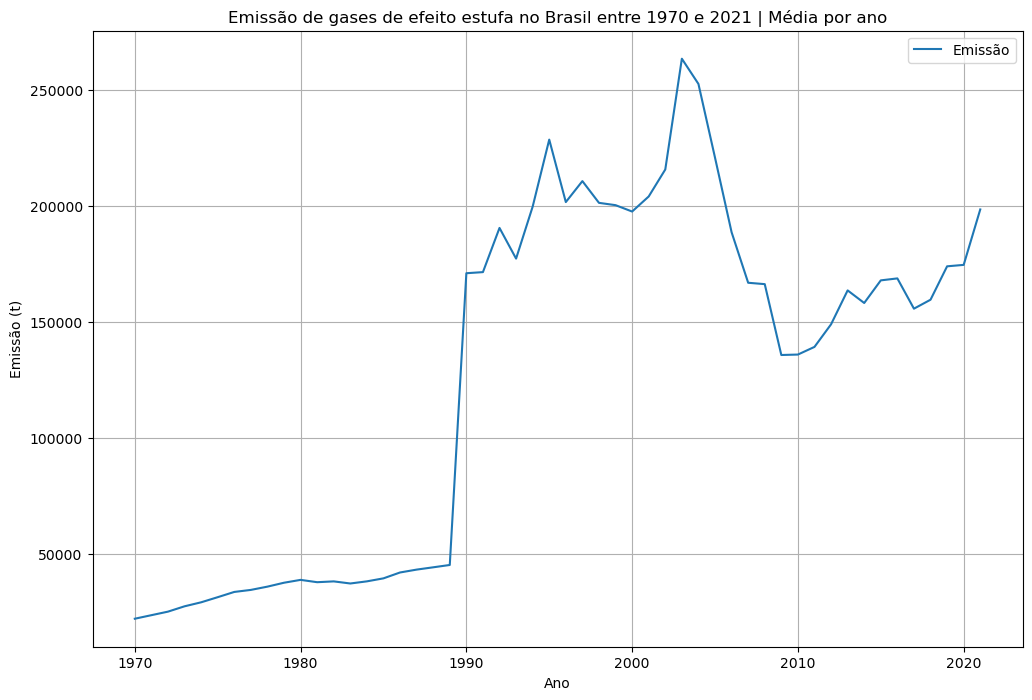

In [36]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(kind='line', figsize=(12, 8), title='Emissão de gases de efeito estufa no Brasil entre 1970 e 2021 | Média por ano', xlabel='Ano', ylabel='Emissão (t)', grid=True)

###### A base de dados só contempla valores referentes ao setor Mudança de Uso da Terra e Floresta a partir dos anos 90, por isso houve o incremento exagerado nesse período, como visto no gráfico acima.

In [37]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax() # Ano de maior emissão média

Emissão    2003
dtype: int64

In [38]:
emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean() # Retorna a média de emissão de cada gás por ano

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [39]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [40]:
media_emissao_anual = media_emissao_anual.pivot(index='Ano', columns='Gás', values='Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


<Axes: title={'center': 'Emissão de gases de efeito estufa no Brasil entre 1970 e 2021 | Média por ano'}, xlabel='Ano', ylabel='Emissão (t)'>

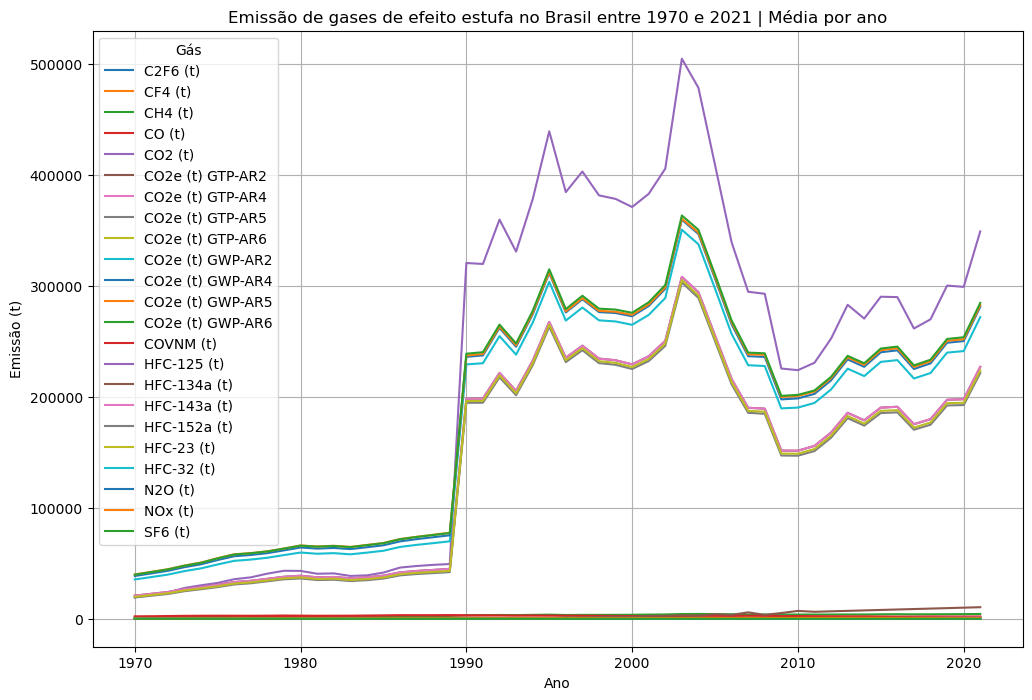

In [41]:
media_emissao_anual.plot(kind='line', figsize=(12, 8), title='Emissão de gases de efeito estufa no Brasil entre 1970 e 2021 | Média por ano', xlabel='Ano', ylabel='Emissão (t)', grid=True)

array([<Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', yla

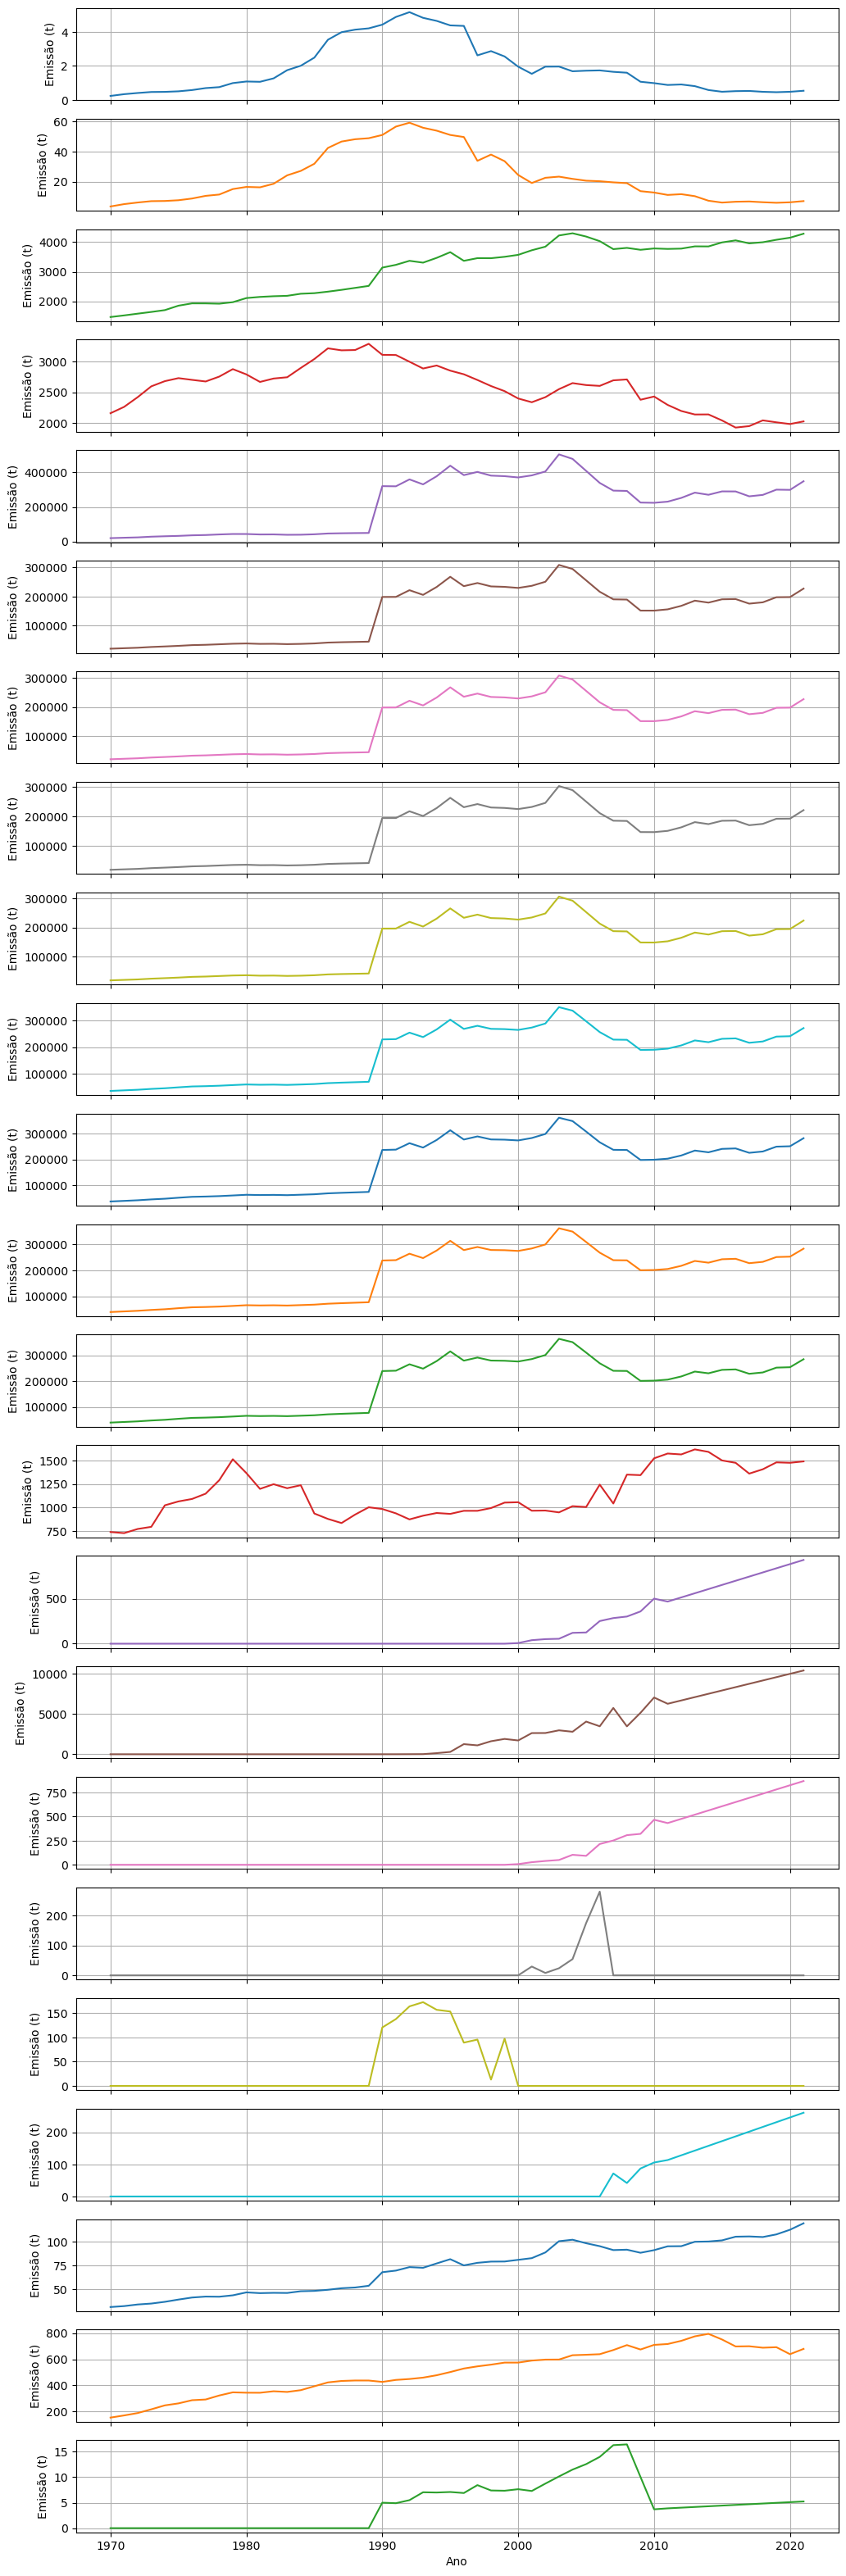

In [42]:
media_emissao_anual.plot(kind='line', figsize=(12, 40), xlabel='Ano', ylabel='Emissão (t)', grid=True, subplots=True, legend=False) # Cria um gráfico para cada gás

### Emissão por setor

In [43]:
emissao_setores = emissoes_por_ano.pivot_table(values = 'Emissão', index = 'Ano', columns = 'Nível 1 - Setor', aggfunc = 'mean')
emissao_setores

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


<Axes: title={'center': 'Emissões por setor'}, xlabel='Ano', ylabel='Emissão (t)'>

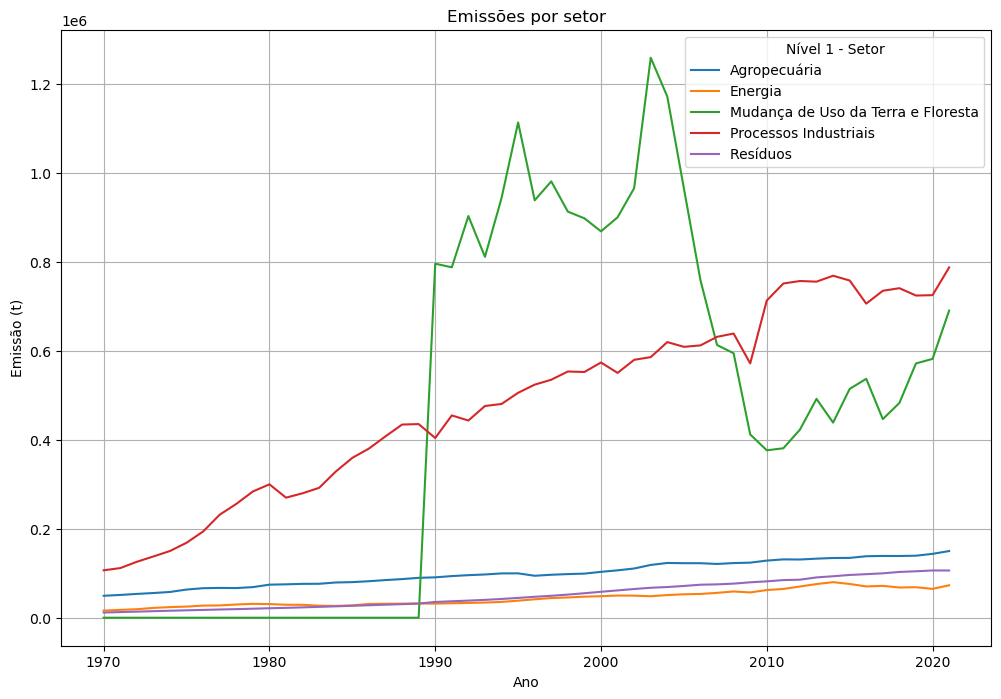

In [44]:
emissao_setores.plot(kind='line', figsize=(12, 8), title='Emissões por setor', xlabel='Ano', ylabel='Emissão (t)', grid=True)

array([<Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>,
       <Axes: xlabel='Ano', ylabel='Emissão (t)'>], dtype=object)

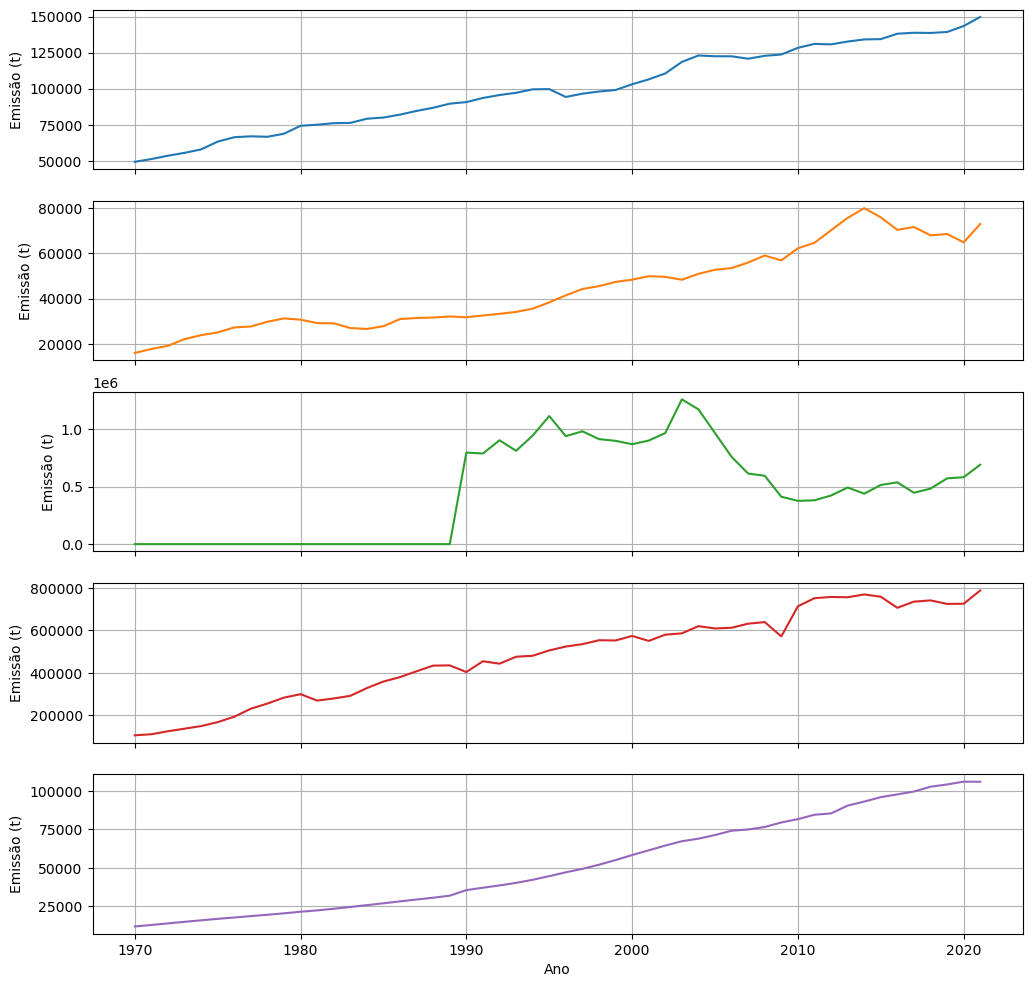

In [45]:
emissao_setores.plot(kind='line', figsize=(12, 12), xlabel='Ano', ylabel='Emissão (t)', grid=True, subplots=True, legend=False) # Cria um gráfico para cada setor

### Emissão per capita

In [47]:
populacao_estados = pd.read_excel('dados/POP2022_Municipios.xls', header=1, skipfooter=34)
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


In [49]:
populacao_estados.groupby('UF').sum(numeric_only=True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


In [50]:
populacao_estados['POPULAÇÃO'].astype(int)

ValueError: invalid literal for int() with base 10: '461.748(1)'

In [54]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na=False)] # Retorna os dados que possuem parênteses

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [56]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex=True),
                 populacao = lambda x : x.loc[:, 'populacao_sem_parenteses'].replace('\.', '', regex=True))

In [57]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [58]:
populacao_estados['populacao'] = populacao_estados['populacao'].astype(int)

In [60]:
populacao_estados.groupby('UF')[['populacao']].sum(numeric_only=True).reset_index()

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


#### Unindo os dados

In [65]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [75]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados.groupby('UF')[['populacao']].sum(numeric_only=True).reset_index(), left_on='Estado', right_on='UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


<Axes: title={'center': 'Emissão de gases de efeito estufa no Brasil em 2021 | Emissão per capita'}, xlabel='População', ylabel='Emissão (t)'>

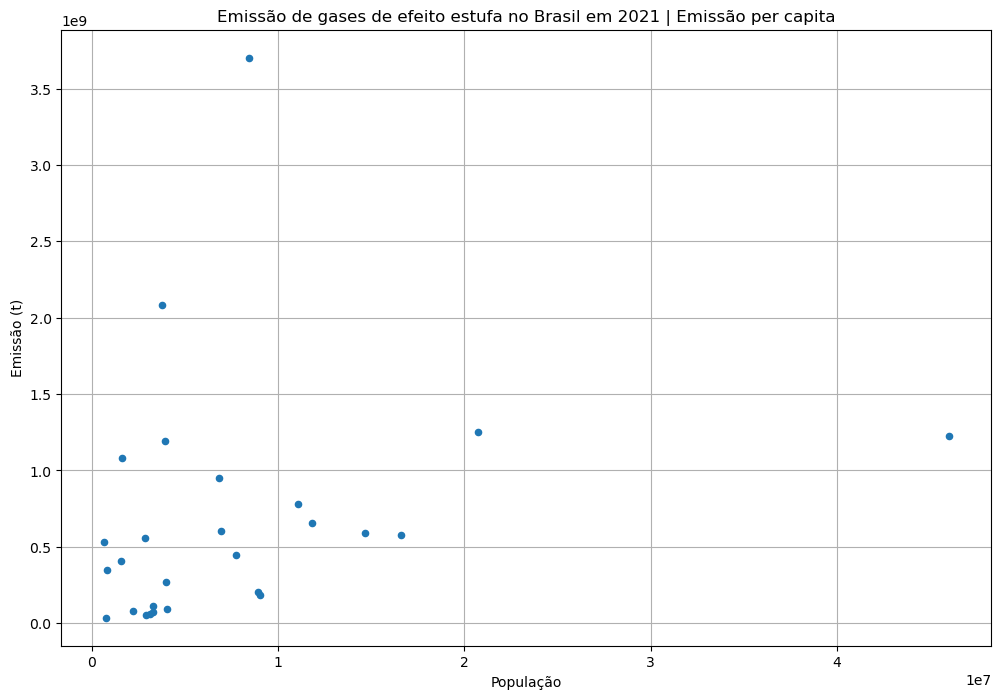

In [76]:
dados_agrupados.plot(kind='scatter', x='populacao', y='Emissão', figsize=(12, 8), title='Emissão de gases de efeito estufa no Brasil em 2021 | Emissão per capita', xlabel='População', ylabel='Emissão (t)', grid=True)

In [77]:
import plotly.express as px

In [78]:
fig = px.scatter(dados_agrupados, x='populacao', y='Emissão', color='Estado', hover_name='Estado', size='Emissão', size_max=60, title='Emissão de gases de efeito estufa no Brasil em 2021 | Emissão per capita', labels={'populacao':'População', 'Emissão':'Emissão (t)'}, text='Estado')
fig.show()

In [82]:
dados_agrupados['Emissão per capita'] = dados_agrupados['Emissão'] / dados_agrupados['populacao']
dados_agrupados.drop(columns=['UF'], inplace=True)
dados_agrupados.sort_values(by='Emissão per capita', ascending=False, inplace=True)
dados_agrupados

,Estado,Emissão,populacao,Emissão per capita
21,RR,5.282071e+08,634805,832.077694
20,RO,1.083515e+09,1616379,670.334662
12,MT,2.081610e+09,3784239,550.073647
13,PA,3.701684e+09,8442962,438.434230
0,AC,3.505471e+08,829780,422.457928
2,AM,1.189649e+09,3952262,301.004463
26,TO,4.082159e+08,1584306,257.662300
11,MS,5.551278e+08,2833742,195.899220
9,MA,9.476324e+08,6800605,139.345312
8,GO,6.008081e+08,6950976,86.435075


In [84]:
px.bar(data_frame=dados_agrupados, x='Estado', y='Emissão per capita', color='Estado', hover_name='Estado', title='Emissão de gases de efeito estufa no Brasil em 2021 | Emissão per capita', labels={'Estado':'Estado', 'Emissão per capita':'Emissão per capita (t)'})

In [87]:
px.scatter(data_frame=dados_agrupados, x='populacao', y='Emissão', color='Estado', hover_name='Estado', size='Emissão per capita', title='Emissão de gases de efeito estufa no Brasil em 2021 | Emissão per capita', labels={'populacao':'População', 'Emissão':'Emissão (t)'}, text='Estado')